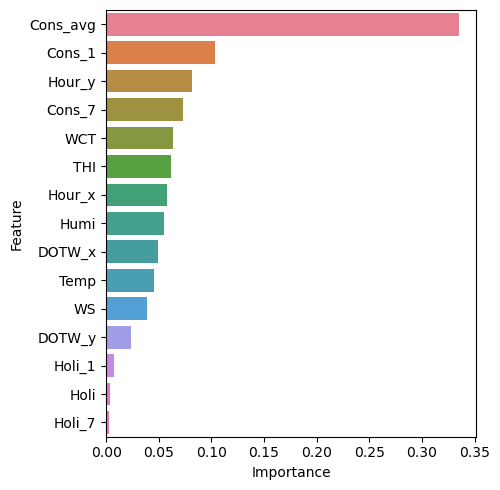

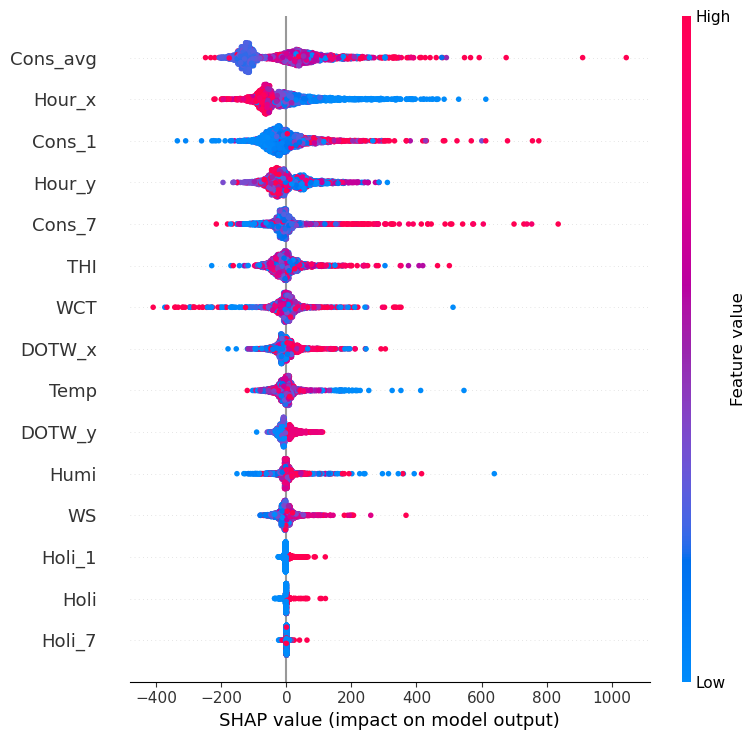

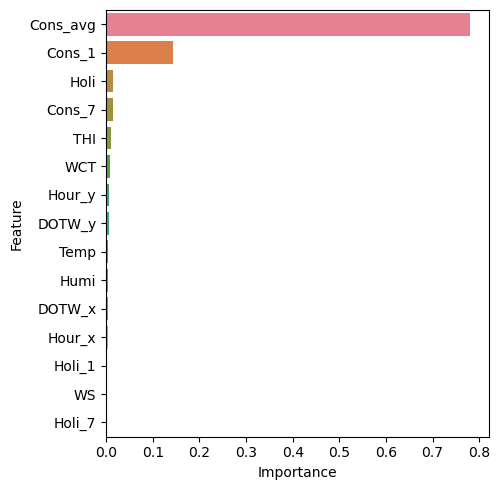

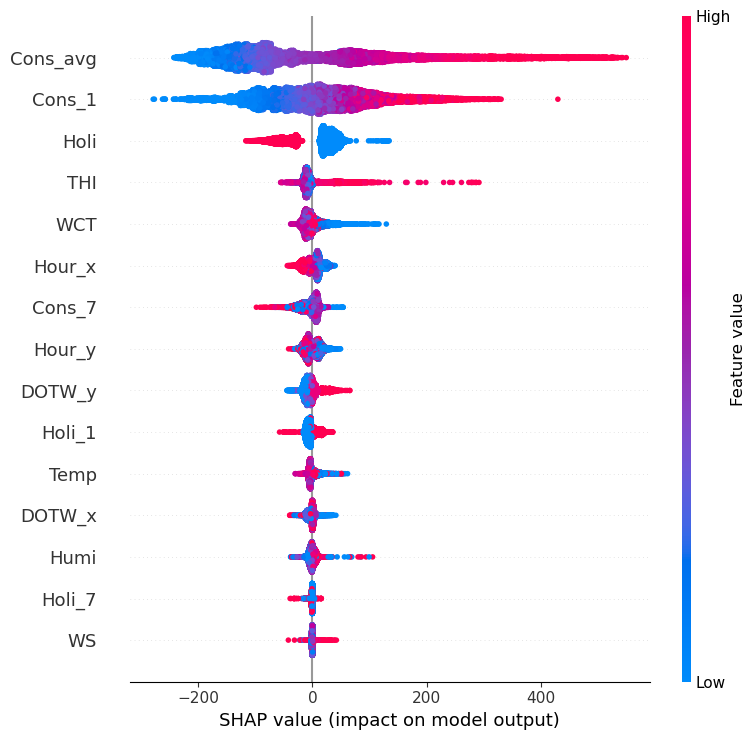

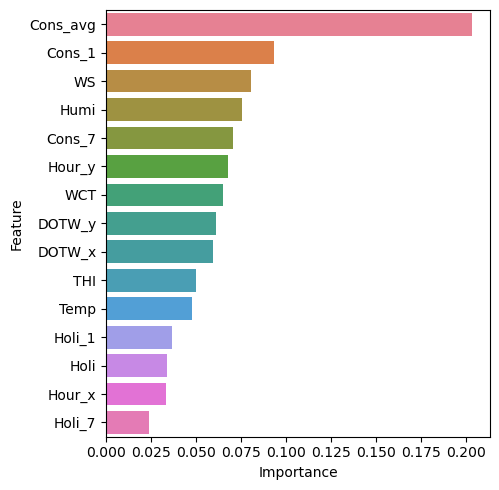

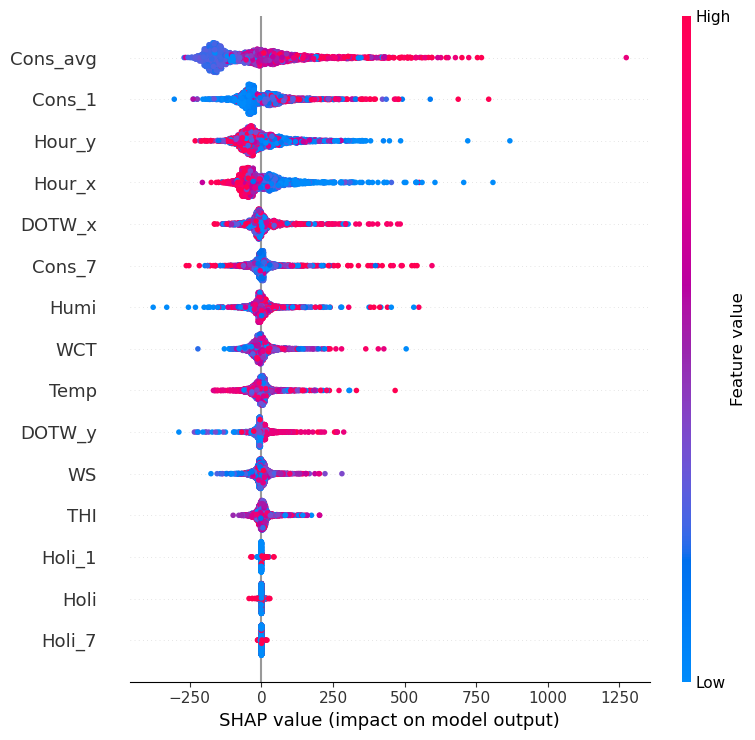

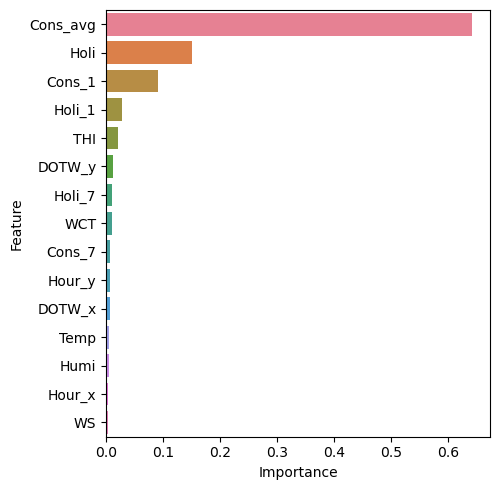

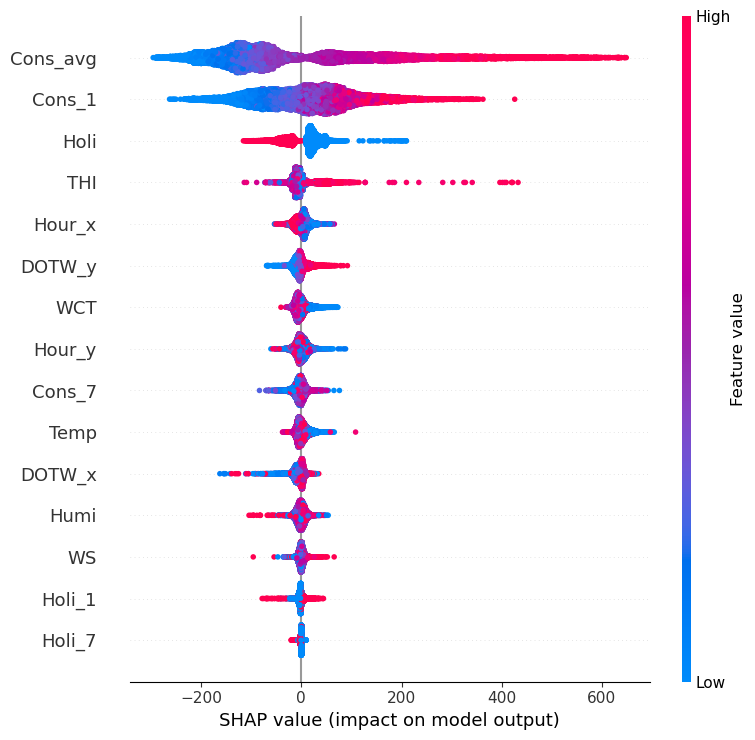

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 2311, number of used features: 15
[LightGBM] [Info] Start training from score 593.903072


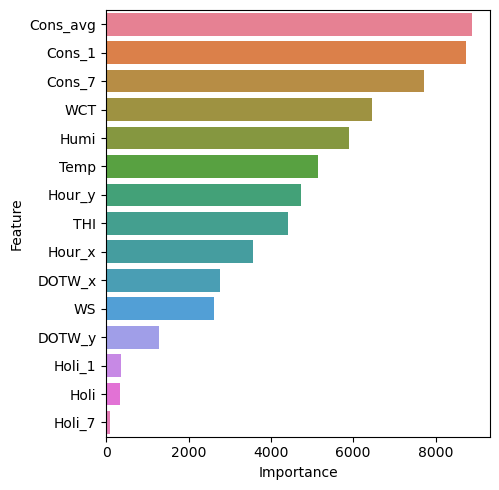

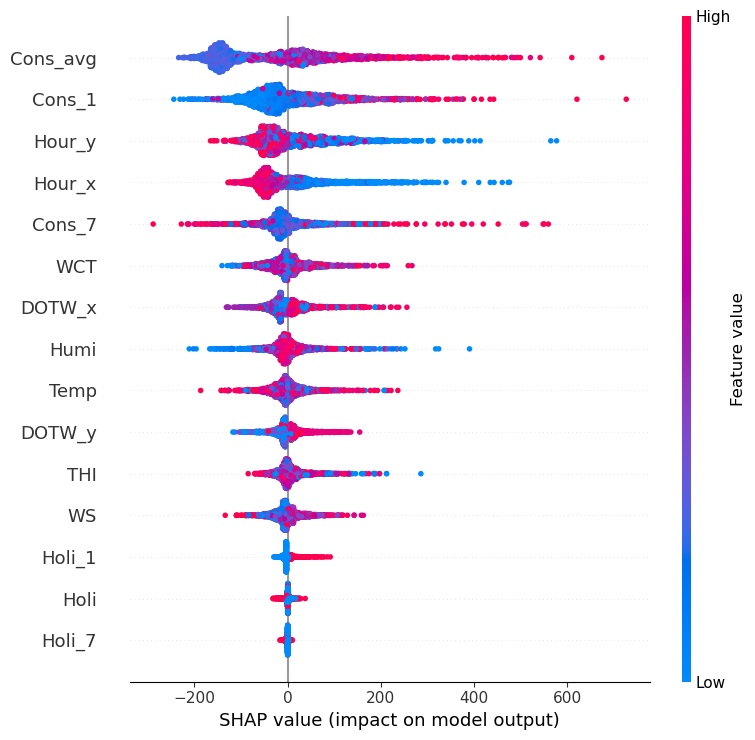

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1911
[LightGBM] [Info] Number of data points in the train set: 20472, number of used features: 15
[LightGBM] [Info] Start training from score 1167.192200


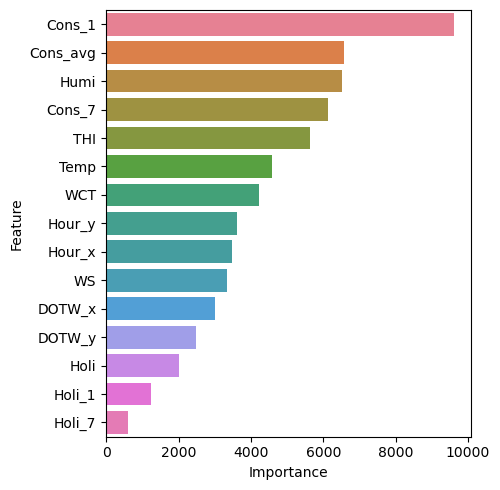

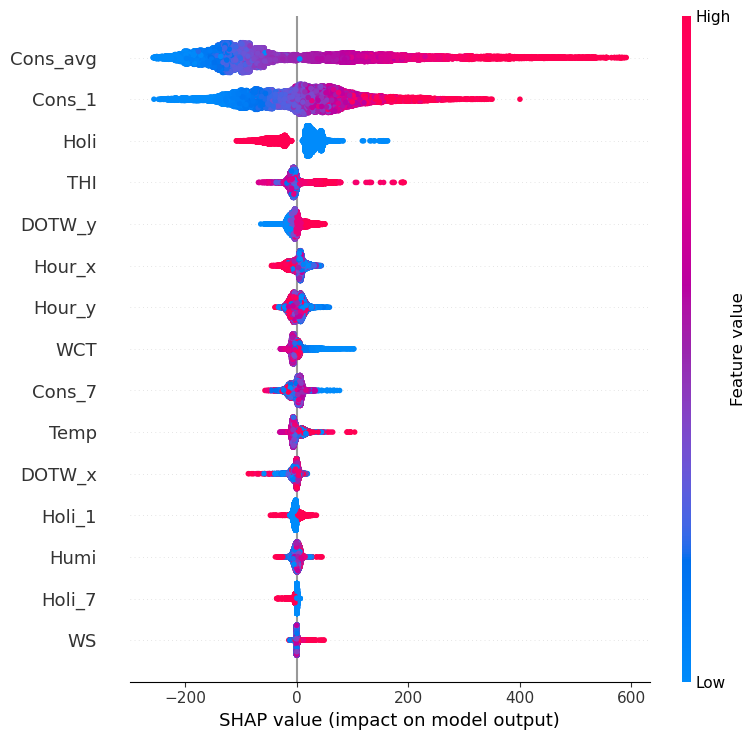

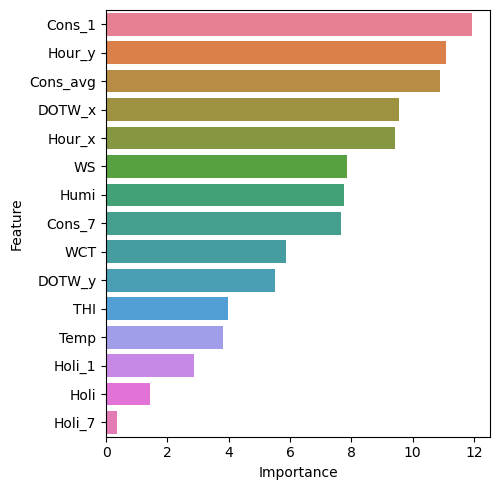

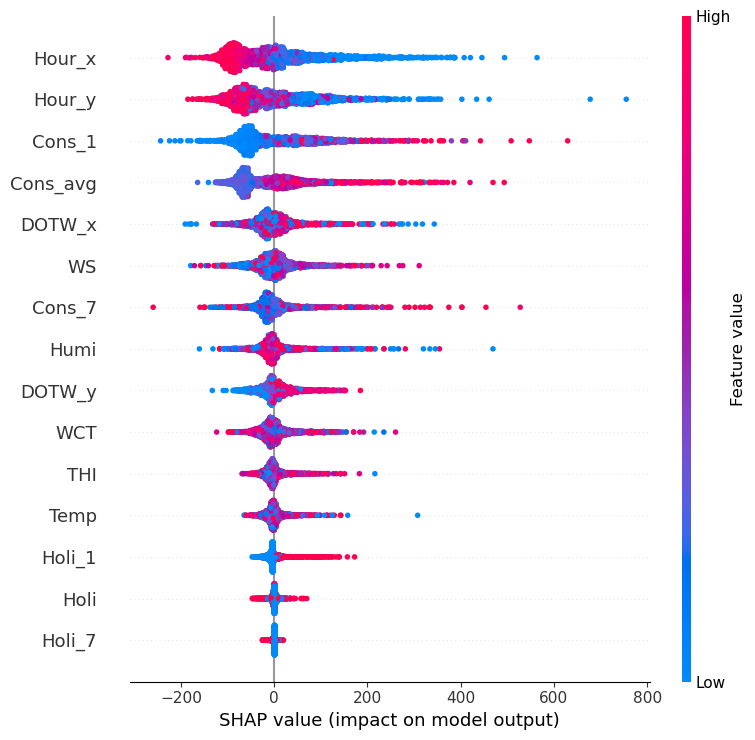

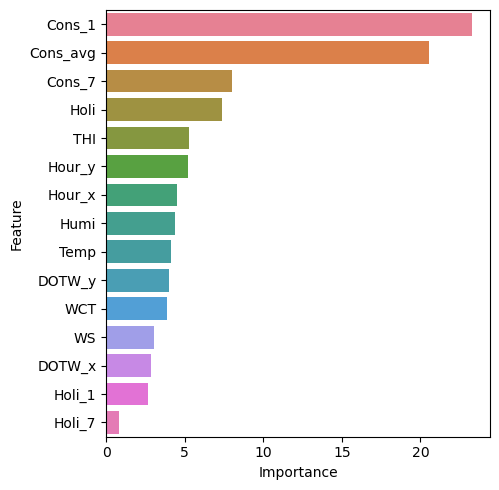

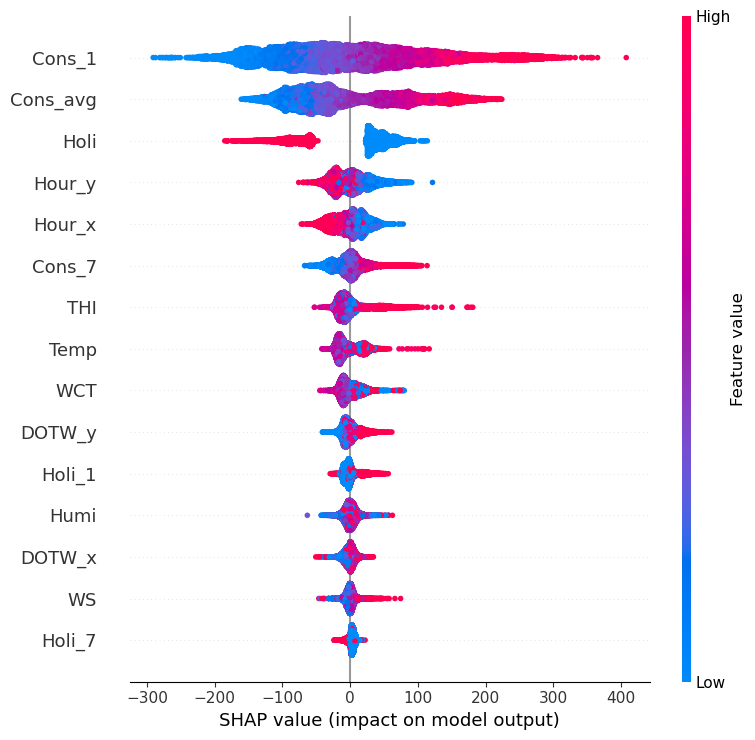

In [5]:
# GradientBoostingRegressor for Household Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

# 데이터 셋 불러오기
data_household = pd.read_csv('dataset_household_PLoS ONE.csv')

# household 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_h = data_household.iloc[:2311, 1:-1]
y_train_h = data_household.iloc[:2311, -1]

# 모델 학습 및 변수 중요도 플롯
model_gbm_h = GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=5, n_estimators=500, random_state=42)
model_gbm_h.fit(X_train_h, y_train_h)

importances = model_gbm_h.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_h.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('GradientBoostingRegressor Feature Importances - Household')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('GradientBoostingRegressor_Household_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_gbm_h = shap.TreeExplainer(model_gbm_h)
shap_values_gbm_h = explainer_gbm_h.shap_values(X_train_h)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_gbm_h, X_train_h, plot_type="dot", show=False)
plt.savefig('GradientBoostingRegressor_Household_SHAP_Dot.pdf')
plt.show()

# GradientBoostingRegressor for KU Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

# 데이터 셋 불러오기
data_ku = pd.read_csv('KU_dormitory_PLoS ONE.csv')

# KU 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_ku = data_ku.iloc[:20472, 5:-1]
y_train_ku = data_ku.iloc[:20472, -1]

# 모델 학습 및 변수 중요도 플롯
model_gbm_ku = GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=5, n_estimators=500, random_state=42)
model_gbm_ku.fit(X_train_ku, y_train_ku)

importances = model_gbm_ku.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_ku.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

# 변수 중요도 플롯
plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('GradientBoostingRegressor Feature Importances - KU')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('GradientBoostingRegressor_KU_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_gbm_ku = shap.TreeExplainer(model_gbm_ku)
shap_values_gbm_ku = explainer_gbm_ku.shap_values(X_train_ku)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_gbm_ku, X_train_ku, plot_type="dot", show=False)
plt.savefig('GradientBoostingRegressor_KU_SHAP_Dot.pdf')
plt.show()

# XGBoostRegressor for Household Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# 데이터 셋 불러오기
data_household = pd.read_csv('dataset_household_PLoS ONE.csv')

# household 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_h = data_household.iloc[:2311, 1:-1]
y_train_h = data_household.iloc[:2311, -1]

# 모델 학습 및 변수 중요도 플롯
model_xgb_h = XGBRegressor(booster='gbtree', colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=1000, subsample=1.0, random_state=42, n_jobs=-1)
model_xgb_h.fit(X_train_h, y_train_h)

importances = model_xgb_h.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_h.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('XGBoostRegressor Feature Importances - Household')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('XGBoostRegressor_Household_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_xgb_h = shap.TreeExplainer(model_xgb_h)
shap_values_xgb_h = explainer_xgb_h.shap_values(X_train_h)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_xgb_h, X_train_h, plot_type="dot", show=False)
plt.savefig('XGBoostRegressor_Household_SHAP_Dot.pdf')
plt.show()

# XGBoostRegressor for KU Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# 데이터 셋 불러오기
data_ku = pd.read_csv('KU_dormitory_PLoS ONE.csv')

# KU 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_ku = data_ku.iloc[:20472, 5:-1]
y_train_ku = data_ku.iloc[:20472, -1]

# 모델 학습 및 변수 중요도 플롯
model_xgb_ku = XGBRegressor(booster='gbtree', colsample_bytree=1.0, learning_rate=0.05, max_depth=10, n_estimators=1000, subsample=1.0, random_state=42, n_jobs=-1)
model_xgb_ku.fit(X_train_ku, y_train_ku)

importances = model_xgb_ku.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_ku.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

# 변수 중요도 플롯
plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('XGBoostRegressor Feature Importances - KU')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('XGBoostRegressor_KU_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_xgb_ku = shap.TreeExplainer(model_xgb_ku)
shap_values_xgb_ku = explainer_xgb_ku.shap_values(X_train_ku)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_xgb_ku, X_train_ku, plot_type="dot", show=False)
plt.savefig('XGBoostRegressor_KU_SHAP_Dot.pdf')
plt.show()

# LightGBM for Household Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor

# 데이터 셋 불러오기
data_household = pd.read_csv('dataset_household_PLoS ONE.csv')

# household 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_h = data_household.iloc[:2311, 1:-1]
y_train_h = data_household.iloc[:2311, -1]

# 모델 학습 및 변수 중요도 플롯
model_lgbm_h = LGBMRegressor(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01, n_estimators=1000, num_leaves=64, subsample=0.5, random_state=42, n_jobs=-1)
model_lgbm_h.fit(X_train_h, y_train_h)

importances = model_lgbm_h.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_h.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('LightGBM Feature Importances - Household')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('LightGBM_Household_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_lgbm_h = shap.TreeExplainer(model_lgbm_h)
shap_values_lgbm_h = explainer_lgbm_h.shap_values(X_train_h)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_lgbm_h, X_train_h, plot_type="dot", show=False)
plt.savefig('LightGBM_Household_SHAP_Dot.pdf')
plt.show()

# LightGBM for KU Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor

# 데이터 셋 불러오기
data_ku = pd.read_csv('KU_dormitory_PLoS ONE.csv')

# KU 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_ku = data_ku.iloc[:20472, 5:-1]
y_train_ku = data_ku.iloc[:20472, -1]

# 모델 학습 및 변수 중요도 플롯
model_lgbm_ku = LGBMRegressor(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.01, n_estimators=1000, num_leaves=64, subsample=0.5, random_state=42, n_jobs=-1)
model_lgbm_ku.fit(X_train_ku, y_train_ku)

importances = model_lgbm_ku.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_ku.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

# 변수 중요도 플롯
plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('LightGBM Feature Importances - KU')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('LightGBM_KU_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_lgbm_ku = shap.TreeExplainer(model_lgbm_ku)
shap_values_lgbm_ku = explainer_lgbm_ku.shap_values(X_train_ku)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_lgbm_ku, X_train_ku, plot_type="dot", show=False)
plt.savefig('LightGBM_KU_SHAP_Dot.pdf')
plt.show()

# CatBoost for Household Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor

# 데이터 셋 불러오기
data_household = pd.read_csv('dataset_household_PLoS ONE.csv')

# household 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_h = data_household.iloc[:2311, 1:-1]
y_train_h = data_household.iloc[:2311, -1]

# 모델 학습 및 변수 중요도 플롯
model_cat_h = CatBoostRegressor(depth=10, l2_leaf_reg=1, learning_rate=0.03, loss_function='RMSE', random_seed=42, verbose=False)
model_cat_h.fit(X_train_h, y_train_h)

importances = model_cat_h.get_feature_importance()
fi_df = pd.DataFrame({'feature_names': X_train_h.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('CatBoost Feature Importances - Household')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('CatBoost_Household_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_cat_h = shap.TreeExplainer(model_cat_h)
shap_values_cat_h = explainer_cat_h.shap_values(X_train_h)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_cat_h, X_train_h, plot_type="dot", show=False)
plt.savefig('CatBoost_Household_SHAP_Dot.pdf')
plt.show()

# CatBoost for KU Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor

# 데이터 셋 불러오기
data_ku = pd.read_csv('KU_dormitory_PLoS ONE.csv')

# KU 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_ku = data_ku.iloc[:20472, 5:-1]
y_train_ku = data_ku.iloc[:20472, -1]

# 모델 학습 및 변수 중요도 플롯
model_cat_ku = CatBoostRegressor(depth=10, l2_leaf_reg=1, learning_rate=0.1, loss_function='RMSE', random_seed=42, verbose=False)
model_cat_ku.fit(X_train_ku, y_train_ku)

importances = model_cat_ku.get_feature_importance()
fi_df = pd.DataFrame({'feature_names': X_train_ku.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

# 변수 중요도 플롯
plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('CatBoost Feature Importances - KU')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('CatBoost_KU_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_cat_ku = shap.TreeExplainer(model_cat_ku)
shap_values_cat_ku = explainer_cat_ku.shap_values(X_train_ku)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_cat_ku, X_train_ku, plot_type="dot", show=False)
plt.savefig('CatBoost_KU_SHAP_Dot.pdf')
plt.show()

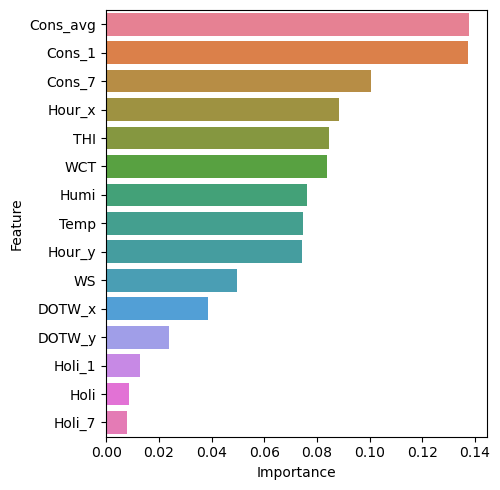

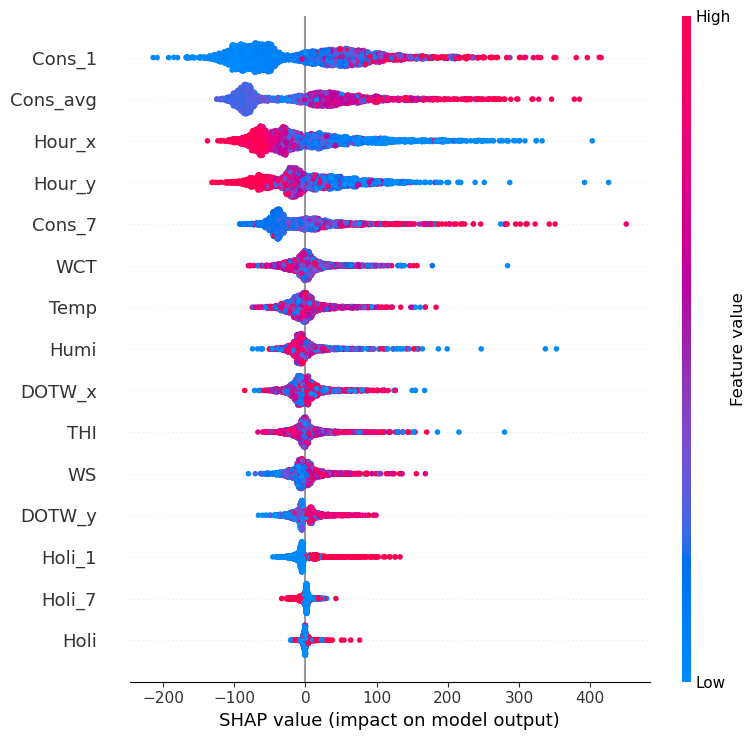

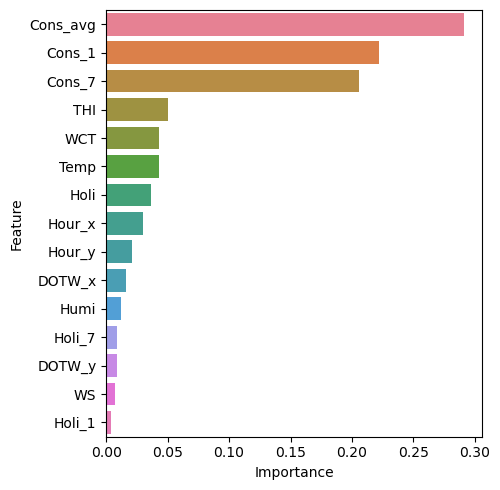

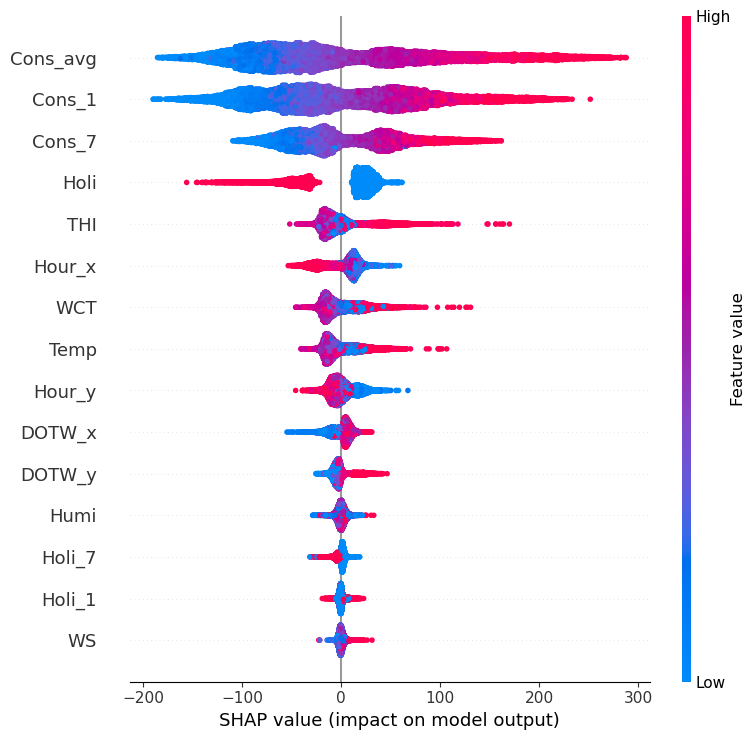

In [6]:
# RandomForestRegressor for Household Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# 데이터 셋 불러오기
data_household = pd.read_csv('dataset_household_PLoS ONE.csv')

# household 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_h = data_household.iloc[:2311, 1:-1]
y_train_h = data_household.iloc[:2311, -1]

# 모델 학습 및 변수 중요도 플롯
model_rf_h = RandomForestRegressor(max_features='sqrt', n_estimators=128, random_state=42, n_jobs=-1)
model_rf_h.fit(X_train_h, y_train_h)

importances = model_rf_h.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_h.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('RandomForestRegressor Feature Importances - Household')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('RandomForestRegressor_Household_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_rf_h = shap.TreeExplainer(model_rf_h)
shap_values_rf_h = explainer_rf_h.shap_values(X_train_h)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_rf_h, X_train_h, plot_type="dot", show=False)
plt.savefig('RandomForestRegressor_Household_SHAP_Dot.pdf')
plt.show()

# RandomForestRegressor for KU Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# 데이터 셋 불러오기
data_ku = pd.read_csv('KU_dormitory_PLoS ONE.csv')

# KU 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_ku = data_ku.iloc[:20472, 5:-1]
y_train_ku = data_ku.iloc[:20472, -1]

# 모델 학습 및 변수 중요도 플롯
model_rf_ku = RandomForestRegressor(max_features='sqrt', n_estimators=128, random_state=42, n_jobs=-1)
model_rf_ku.fit(X_train_ku, y_train_ku)

importances = model_rf_ku.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_ku.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

# 변수 중요도 플롯
plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('RandomForestRegressor Feature Importances - KU')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('RandomForestRegressor_KU_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_rf_ku = shap.TreeExplainer(model_rf_ku)
shap_values_rf_ku = explainer_rf_ku.shap_values(X_train_ku)

# SHAP summary plot (dot)
plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_rf_ku, X_train_ku, plot_type="dot", show=False)
plt.savefig('RandomForestRegressor_KU_SHAP_Dot.pdf')
plt.show()

In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
   ---------------------- ----------------- 256.0/455.5 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 455.5/455.5 kB 9.7 MB/s eta 0:00:00


In [4]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.7/99.8 MB 10.9 MB/s eta 0:00:10
    --------------------------------------- 1.6/99.8 MB 14.9 MB/s eta 0:00:07
   - -------------------------------------- 3.0/99.8 MB 19.4 MB/s eta 0:00:05
   - -------------------------------------- 4.6/99.8 MB 22.5 MB/s eta 0:00:05
   -- ------------------------------------- 7.1/99.8 MB 28.5 MB/s eta 0:00:04
   --- ------------------------------------ 9.9/99.8 MB 33.4 MB/s eta 0:00:03
   ----- ---------------------------------- 13.1/99.8 MB 54.7 MB/s eta 0:00:02
   ------ --------------------------------- 15.8/99.8 MB 59.5 MB/s eta 0:00:02
   ------- -------------------------------- 18.9/99.8 MB 65.6 MB/s eta 0:00:02
   -------- ------------------------------- 22.2/99.8 MB 73.1 MB/s eta 0:00

In [16]:
# GradientBoostingRegressor for KU Data
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

# 데이터 셋 불러오기
data_ku = pd.read_csv('KU_dormitory_PLoS ONE.csv')

# KU 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_ku = data_ku.iloc[168:20472, 5:-1]
y_train_ku = data_ku.iloc[168:20472, -1]
print(X_train_ku)

         Hour_x    Hour_y    DOTW_x   DOTW_y  Holi  Temp  Humi   WS  \
168    0.000000  1.000000  0.781831  0.62349     0  21.0  55.9  2.5   
169    0.258819  0.965926  0.781831  0.62349     0  20.3  60.2  1.9   
170    0.500000  0.866025  0.781831  0.62349     0  19.8  60.7  3.2   
171    0.707107  0.707107  0.781831  0.62349     0  19.0  67.0  2.8   
172    0.866025  0.500000  0.781831  0.62349     0  18.1  69.8  2.8   
...         ...       ...       ...      ...   ...   ...   ...  ...   
20467 -0.965926  0.258819 -0.781831  0.62349     1   0.0  31.2  3.2   
20468 -0.866025  0.500000 -0.781831  0.62349     1  -1.0  31.9  0.7   
20469 -0.707107  0.707107 -0.781831  0.62349     1  -1.6  34.5  0.9   
20470 -0.500000  0.866025 -0.781831  0.62349     1  -2.1  36.0  2.3   
20471 -0.258819  0.965926 -0.781831  0.62349     1  -2.6  39.8  1.0   

             THI        WCT   Cons_1  Holi_1   Cons_7  Holi_7     Cons_avg  
168    66.937910  22.647437  1003.68       0  1198.80       0  1123.77

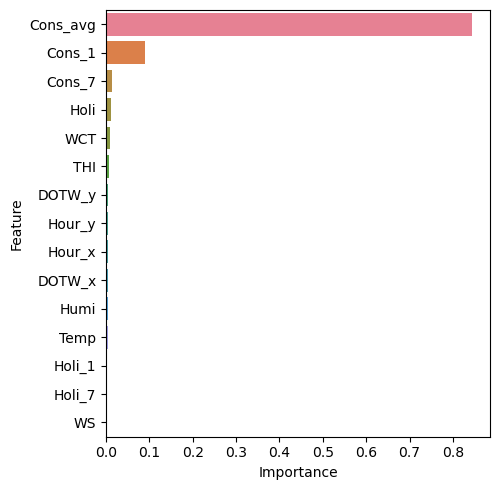

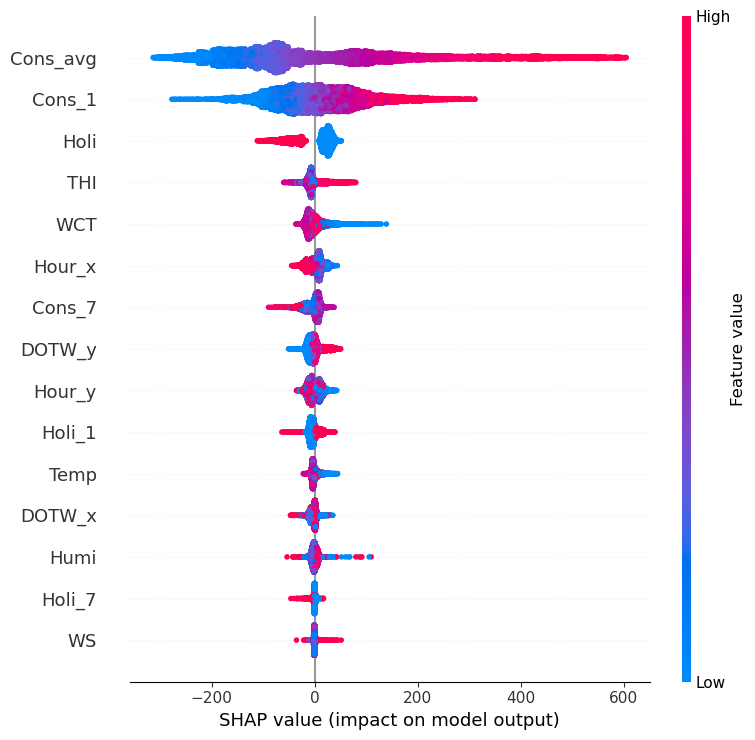

In [17]:
# 모델 학습 및 변수 중요도 플롯
model_gbm_ku = GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=5, n_estimators=500, random_state=42)
model_gbm_ku.fit(X_train_ku, y_train_ku)

importances = model_gbm_ku.feature_importances_
fi_df = pd.DataFrame({'feature_names': X_train_ku.columns, 'feature_importance': importances})
fi_df = fi_df.sort_values(by='feature_importance', ascending=False)

# 색상 팔레트 지정
palette = sns.color_palette("husl", len(fi_df))

# 변수 중요도 플롯
plt.figure(figsize=(5.1, 5))
sns.barplot(x='feature_importance', y='feature_names', data=fi_df, palette=palette)
# plt.title('GradientBoostingRegressor Feature Importances - KU')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('GradientBoostingRegressor_KU_Feature_Importance.pdf')
plt.show()

# SHAP values 계산 및 summary plot
explainer_gbm_ku = shap.TreeExplainer(model_gbm_ku)
shap_values_gbm_ku = explainer_gbm_ku.shap_values(X_train_ku)

plt.figure(figsize=(5.1, 5))
shap.summary_plot(shap_values_gbm_ku, X_train_ku, plot_type="dot", show=False)
plt.savefig('GradientBoostingRegressor_KU_SHAP_Dot.pdf')
plt.show()

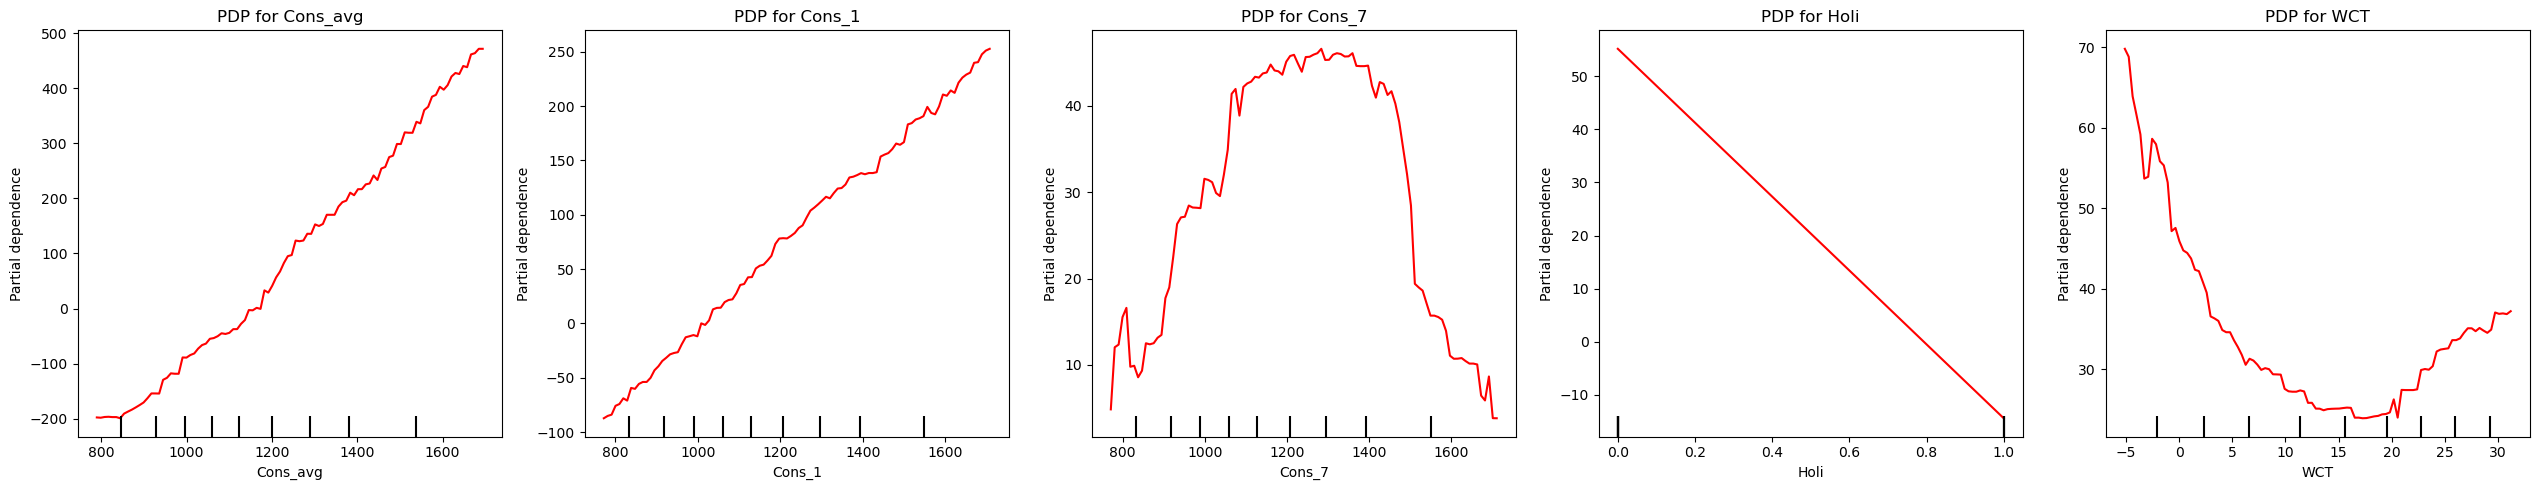

In [22]:
# !pip install -U scikit-learn
from sklearn.inspection import PartialDependenceDisplay

important_features = fi_df['feature_names'].head(5).tolist()

fig, axs = plt.subplots(ncols=len(important_features), figsize=(25.5, 5))

for i, feature in enumerate(important_features):
    PartialDependenceDisplay.from_estimator(
        model_gbm_ku, X_train_ku, features=[feature], ax=axs[i], line_kw={"color":"red"}
    )
    axs[i].set_title(f'PDP for {feature}')

plt.tight_layout()
plt.savefig('PDP_scikit_KU.pdf')
plt.show()

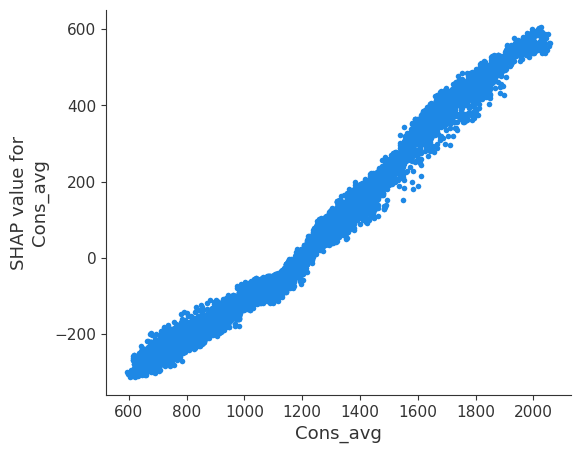

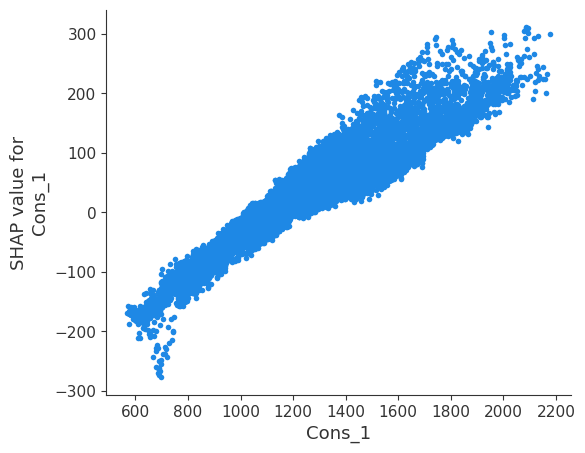

In [19]:
for feature in important_features:
    shap.dependence_plot(feature, shap_values_gbm_ku, X_train_ku, interaction_index=None, show=False)
    plt.savefig(f'SHAP_Dependence_[feature]_KU.pdf')
    plt.show()

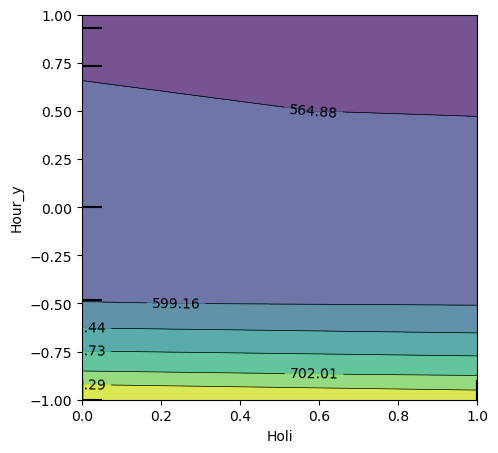

In [67]:
features = [('Holi', 'Hour_y')]

fig, ax = plt.subplots(figsize=(5.1, 5))

PartialDependenceDisplay.from_estimator(model_cat_h, X_train_h, features=features, kind="average", ax=ax, grid_resolution=100)
plt.savefig(f'PDP_H_3.pdf')
plt.show()

In [79]:
fig, ax = plt.subplots(figsize=(5.1, 5))  # Setting the size of the figure

# Generate the SHAP dependence plot
shap.dependence_plot(
    ind='THI', 
    interaction_index='Cons_avg', 
    shap_values=shap_values_gbm_ku, 
    features=X_train_ku, 
    ax=ax,
    show=False  # Ensure plot does not automatically show
)

# Save the plot
plt.savefig('SHAP_Dependence_ku2.pdf', bbox_inches='tight')  # Saves the figure to a file
plt.close(fig)  # Close the figure to free up memory

In [53]:
print(shap_values_gbm_ku[0])

[  2.06807218  -6.20824681   0.92988479   0.24214376  20.80029903
  -3.88570235   0.51683436  -0.50879547  -0.48545154  -8.92752997
 -50.8476464   -3.79354958   5.94335177   0.27287539 -63.00206747]


In [80]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=cb83c1a8b12dbd2fb3b63680b3cbe26039ec6a90b325c454a6b879dfe33cc7ea
  Stored in directory: C:\Users\user\AppData\Local\Temp\pip-ephem-wheel-cache-0lim7gl7\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [85]:
# 데이터 셋 불러오기
data_household = pd.read_csv('dataset_household_PLoS ONE.csv')

# household 데이터를 트레이닝 셋과 테스트 셋으로 분리
X_train_h = data_household.iloc[:2311, 1:-1]
y_train_h = data_household.iloc[:2311, -1]
X_test_h = data_household.iloc[2311:, 1:-1]  # 테스트 데이터 입력 변수
y_test_h = data_household.iloc[2311:, -1]    # 테스트 데이터 출력 변수

# 모델 학습 및 변수 중요도 플롯
model_cat_h = CatBoostRegressor(depth=10, l2_leaf_reg=1, learning_rate=0.03, loss_function='RMSE', random_seed=42, verbose=False)
model_cat_h.fit(X_train_h, y_train_h)

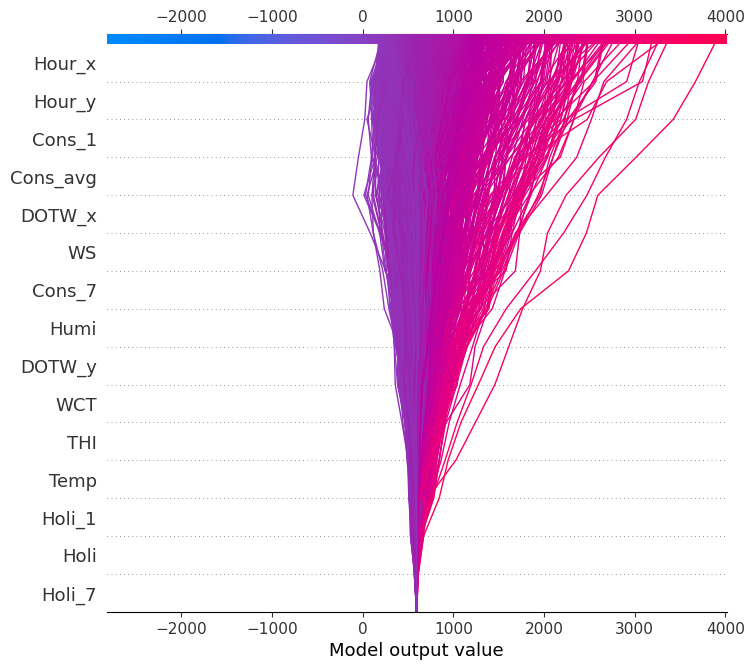

In [88]:
explainer = shap.TreeExplainer(model_cat_h)
shap_values = explainer.shap_values(X_train_h)

In [108]:
plt.figure(figsize=(15, 7.5))
shap.decision_plot(explainer.expected_value, shap_values, X_test_h, ignore_warnings=True, show=False)
plt.gcf().savefig('fuck.png', dpi=1000, bbox_inches='tight')
plt.close()

In [82]:
# LIME 설명 생성기 초기화
explainer = lime_tabular.LimeTabularExplainer(
    X.values,  # 모델 훈련에 사용된 입력 데이터
    feature_names=X.columns.tolist(),  # 입력 변수 이름
    class_names=['Consumption'],  # 출력 변수 이름
    mode='regression'  # 회귀 모델 설정
)

# 테스트 데이터의 특정 인스턴스에 대한 LIME 설명 생성
i = 25  # 테스트 데이터에서 설명하고자 하는 인스턴스의 인덱스
exp = explainer.explain_instance(X_test_ku.values[i], model_gbm_ku.predict, num_features=15)  # 상위 5개의 특성으로 설명
exp.show_in_notebook(show_table=True, show_all=False)  # 노트북에 결과 표시
exp.save_to_file('LIME_Explanation_KU.html')  # 설명 결과를 HTML 파일로 저장

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  # for stateless transformers.
